### Testing Evo

#### Imports

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import math
import torch_geometric
from torch_geometric.nn import GCNConv
import IPython
from IPython.display import display, HTML, Image
from torch_geometric.loader import DataLoader

from generator import generate_organism
from cell import Cell
from organism import Organism
from GNCAmodel import GNCA
from visualizer import Visualizer
from evo_trainer import Evo_Trainer

%run graphUtils.py
%run Visualizer.py # --allows for reloading the particular code
#%run CGConv.py

#### Train the network

In [2]:
n = 10
popsize = 10
generations = 500
batch_size = 8
wrap_around = True
name = 'centered17'
#device = torch.device('mps')
device = torch.device('cpu')
trainer = Evo_Trainer(n, device, batch_size, True, popsize)

2023-03-19 23:16:15,667	INFO worker.py:1528 -- Started a local Ray instance.


[2023-03-19 23:16:17] INFO     <27462> evotorch.core: Instance of `Custom_NEProblem` (id:11309545168) -- The `dtype` for the problem's decision variables is set as torch.float32
[2023-03-19 23:16:17] INFO     <27462> evotorch.core: Instance of `Custom_NEProblem` (id:11309545168) -- `eval_dtype` (the dtype of the fitnesses and evaluation data) is set as torch.float32
[2023-03-19 23:16:17] INFO     <27462> evotorch.core: Instance of `Custom_NEProblem` (id:11309545168) -- The `device` of the problem is set as cpu
[2023-03-19 23:16:17] INFO     <27462> evotorch.core: Instance of `Custom_NEProblem` (id:11309545168) -- The number of actors that will be allocated for parallelized evaluation is 10
[2023-03-19 23:16:17] INFO     <27462> evotorch.core: Instance of `Custom_NEProblem` (id:11309545168) -- Number of GPUs that will be allocated per actor is None


/Users/martinholst/miniconda3/envs/AML/lib/python3.10/site-packages/evotorch/tools/misc.py:1107: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  result = torch.tensor(data, **kwargs)


In [3]:
#generations = 10

In [4]:
#[trainer.searcher.before_step_hook() for i in range(100)]

In [5]:
trainer.train(generations, name)

         iter : 1
     stepsize : ReadOnlyTensor(0.0394)
    mean_eval : 8.467676162719727
pop_best_eval : 11.388822555541992
  median_eval : 8.85901165008545

         iter : 2
     stepsize : ReadOnlyTensor(0.0389)
    mean_eval : 4.541459083557129
pop_best_eval : 8.403787612915039
  median_eval : 3.7114181518554688

         iter : 3
     stepsize : ReadOnlyTensor(0.0384)
    mean_eval : 8.361577987670898
pop_best_eval : 13.20784854888916
  median_eval : 8.987649917602539

         iter : 4
     stepsize : ReadOnlyTensor(0.0379)
    mean_eval : 8.064021110534668
pop_best_eval : 11.156064987182617
  median_eval : 7.720668792724609

         iter : 5
     stepsize : ReadOnlyTensor(0.0375)
    mean_eval : 9.37215518951416
pop_best_eval : 13.302877426147461
  median_eval : 9.231491088867188

         iter : 6
     stepsize : ReadOnlyTensor(0.0372)
    mean_eval : 6.172554969787598
pop_best_eval : 10.170869827270508
  median_eval : 6.820465564727783

         iter : 7
     stepsize : Rea

In [6]:
network = trainer.get_trained_network()

In [7]:
#trainer.logger_df.from_csv('../logger/' + name + '.csv')
network.load_state_dict(torch.load('../models/' + name + '.pth'))

<All keys matched successfully>

In [8]:
#network = trainer.problem.parameterize_net(trainer.searcher.status['best'][0])
network = trainer.problem.parameterize_net(trainer.searcher.status['center'][0])
#network = trainer.problem.parameterize_net(trainer.searcher.status['obj0_pop_best'])

In [9]:
#trainer.searcher.status

#### Visualize trained network

In [10]:
v_batch_size= 8
graphs = [generate_organism(n, device).toGraph() for _ in range(v_batch_size)]
loader = DataLoader(graphs, batch_size=v_batch_size)
graph = next(iter(loader))
visualizer = Visualizer(wrap_around, v_batch_size)
network.batch_size = v_batch_size
network(graph, 0)

DataBatch(x=[480, 5], edge_index=[1, 0], device=[8], subsize=[8], energy=[8], velocity=[8], border_cost=[8], food_reward=[8], dead_cost=[8], visible_food=[8], food_avg_dist=[8], food_avg_degree=[8], food_search_movement=[8], batch=[480], ptr=[9])

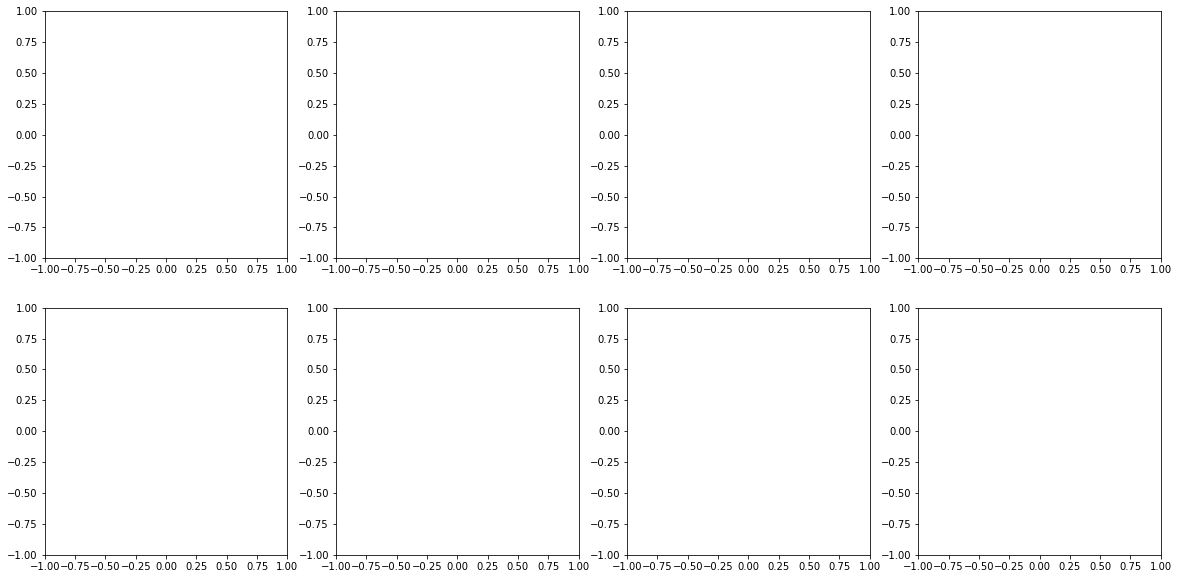

In [11]:
anim = visualizer.animate_organism(graph, network, food=30, frames=200)
visualizer.save_animation_to_gif(anim, name, 10, dpi=50)

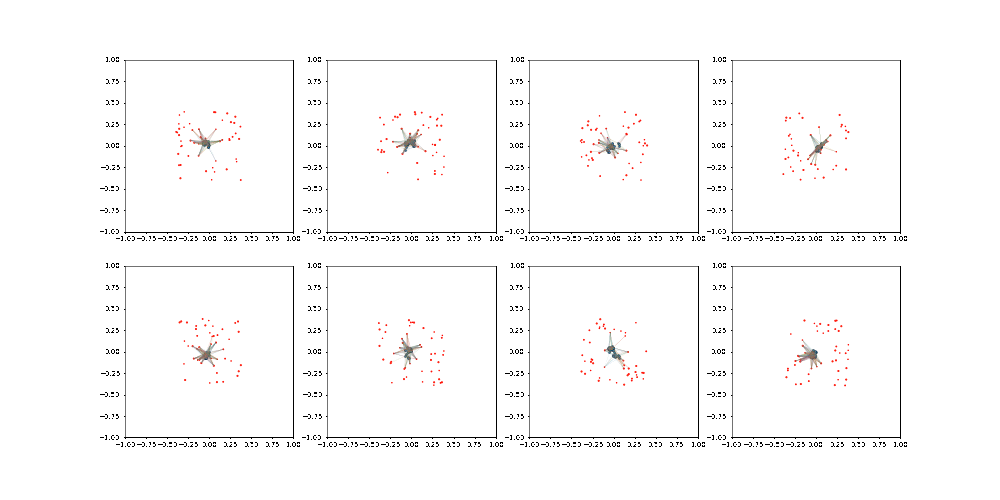

In [ ]:
Image('../animation/' + name + '.gif')

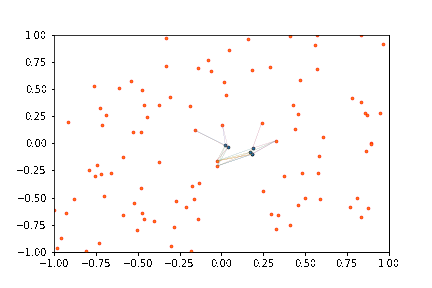

In [ ]:
Image('../animation/GATConv1.gif')

In [ ]:
#anim.frame_seq = anim.new_saved_frame_seq() 
#IPython.display.HTML(anim.to_jshtml())

In [ ]:
print(network)

Conv(
  (conv_layer_food): CustomConvSimple(2, dim=3)
  (conv_layer_cell): CustomConvSimple(2, dim=3)
  (mlp_before): Sequential(
    (0): Linear(in_features=2, out_features=2, bias=True)
    (1): Tanh()
  )
  (mlp_middle): Sequential(
    (0): Linear(in_features=4, out_features=2, bias=True)
    (1): Tanh()
  )
  (mlp): Sequential(
    (0): Tanh()
    (1): Linear(in_features=2, out_features=2, bias=True)
    (2): Tanh()
  )
  (gConvGRU): GConvGRU(
    (conv_x_z): ChebConv(2, 2, K=1, normalization=sym)
    (conv_h_z): ChebConv(2, 2, K=1, normalization=sym)
    (conv_x_r): ChebConv(2, 2, K=1, normalization=sym)
    (conv_h_r): ChebConv(2, 2, K=1, normalization=sym)
    (conv_x_h): ChebConv(2, 2, K=1, normalization=sym)
    (conv_h_h): ChebConv(2, 2, K=1, normalization=sym)
  )
  (mlp_edge): Sequential(
    (0): Linear(in_features=3, out_features=3, bias=True)
    (1): Tanh()
    (2): Linear(in_features=3, out_features=3, bias=True)
    (3): Tanh()
  )
  (conv_layer_cells): CustomConvSim

In [ ]:
print('GConvGRU: ', network.gConvGRU)
for param in network.gConvGRU.parameters():
  print(param.data)


GConvGRU:  GConvGRU(
  (conv_x_z): ChebConv(2, 2, K=1, normalization=sym)
  (conv_h_z): ChebConv(2, 2, K=1, normalization=sym)
  (conv_x_r): ChebConv(2, 2, K=1, normalization=sym)
  (conv_h_r): ChebConv(2, 2, K=1, normalization=sym)
  (conv_x_h): ChebConv(2, 2, K=1, normalization=sym)
  (conv_h_h): ChebConv(2, 2, K=1, normalization=sym)
)
tensor([ 0.2250, -0.6002])
tensor([[-0.5494, -0.2970],
        [ 0.7234,  0.0878]])
tensor([0.3283, 2.0520])
tensor([[-0.0113, -0.3734],
        [ 0.2090, -0.5475]])
tensor([0.6642, 1.6680])
tensor([[ 0.9564, -0.2807],
        [ 0.1361, -0.6171]])
tensor([ 0.5993, -0.0551])
tensor([[-1.1495, -0.3697],
        [ 0.0898,  0.3180]])
tensor([-0.4224,  0.2437])
tensor([[ 0.2571,  0.1966],
        [-0.1113, -1.7707]])
tensor([ 1.8473, -0.2655])
tensor([[ 1.1713, -2.2223],
        [ 0.3448, -0.0823]])


In [ ]:
%%javascript
IPython.notebook.save_notebook()

<IPython.core.display.Javascript object>

#### Visualization of loss:

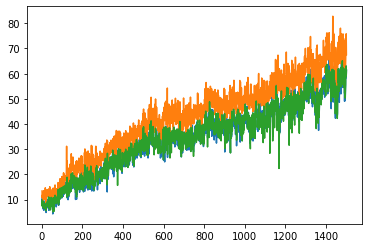

In [ ]:
import matplotlib.pyplot as plt
losses = trainer.logger_df
#print(losses)
#plt.plot(losses.stepsize)

plt.plot(losses.median_eval)
plt.plot(losses.pop_best_eval)
plt.plot(losses.mean_eval)
#plt.legend(('median_eval', 'pop_best_eval', 'mean eval'))
plt.show()

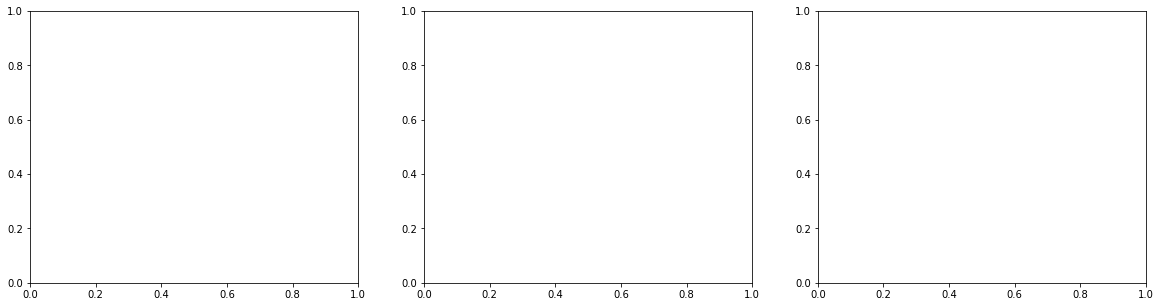

In [ ]:
trainer.logger_df
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))
fig.suptitle('')
plt.show()

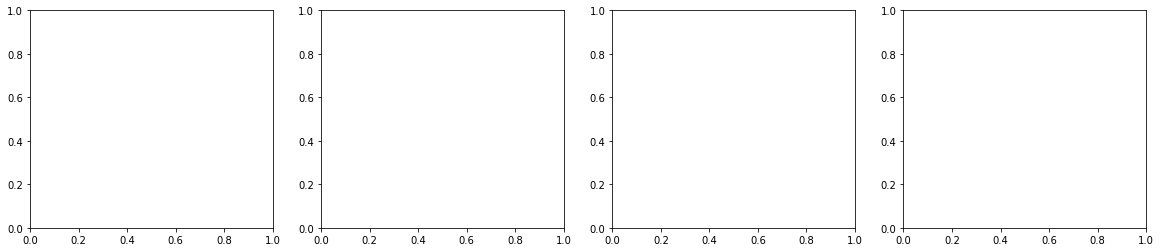

In [ ]:
fig, axs = plt.subplots(1, 4, figsize=(20,4))

In [ ]:
[print((i, j)) for i in range(10) for j in range(10)]

(0, 0)
(0, 1)
(0, 2)
(0, 3)
(0, 4)
(0, 5)
(0, 6)
(0, 7)
(0, 8)
(0, 9)
(1, 0)
(1, 1)
(1, 2)
(1, 3)
(1, 4)
(1, 5)
(1, 6)
(1, 7)
(1, 8)
(1, 9)
(2, 0)
(2, 1)
(2, 2)
(2, 3)
(2, 4)
(2, 5)
(2, 6)
(2, 7)
(2, 8)
(2, 9)
(3, 0)
(3, 1)
(3, 2)
(3, 3)
(3, 4)
(3, 5)
(3, 6)
(3, 7)
(3, 8)
(3, 9)
(4, 0)
(4, 1)
(4, 2)
(4, 3)
(4, 4)
(4, 5)
(4, 6)
(4, 7)
(4, 8)
(4, 9)
(5, 0)
(5, 1)
(5, 2)
(5, 3)
(5, 4)
(5, 5)
(5, 6)
(5, 7)
(5, 8)
(5, 9)
(6, 0)
(6, 1)
(6, 2)
(6, 3)
(6, 4)
(6, 5)
(6, 6)
(6, 7)
(6, 8)
(6, 9)
(7, 0)
(7, 1)
(7, 2)
(7, 3)
(7, 4)
(7, 5)
(7, 6)
(7, 7)
(7, 8)
(7, 9)
(8, 0)
(8, 1)
(8, 2)
(8, 3)
(8, 4)
(8, 5)
(8, 6)
(8, 7)
(8, 8)
(8, 9)
(9, 0)
(9, 1)
(9, 2)
(9, 3)
(9, 4)
(9, 5)
(9, 6)
(9, 7)
(9, 8)
(9, 9)


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [ ]:
for ii, i in enumerate(range(1, 10)):
    print((ii, i))

(0, 1)
(1, 2)
(2, 3)
(3, 4)
(4, 5)
(5, 6)
(6, 7)
(7, 8)
(8, 9)
